Import all the modules that I need for the lab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import requests
from numpy.ma.extras import corrcoef

# Question 1
 Generate a dataset that represents a sample of 10,000 cars. Assume you have collected information on the price of the car, the mileage, and the age of the car. Think about how the variables may be correlated with each other when you create the dataset (e.g., mileage and age are probably positively related). Describe the variables with describe() and talk about the choices you made to generate a dataset that looks roughly realistic. (This requires some thought.)

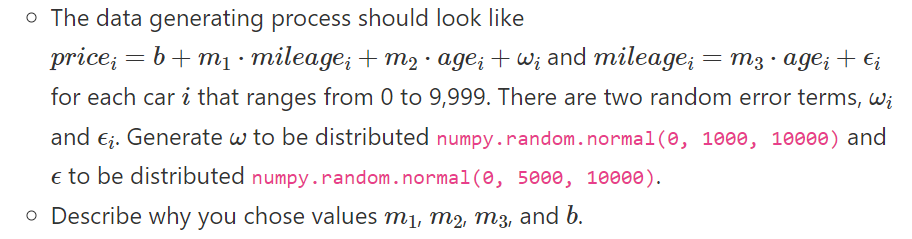

In [2]:
# 10000 rows
# age is not a function, it can be randomly generated.

N=10000
cars=pd.DataFrame(
    data={
        "age": np.random.uniform(0,15,N)
    }
)

In [3]:
#create errors
W=np.random.normal(0,1000,N)
E=np.random.normal(0,5000,N)

In [4]:
#m1 = extra mileage, independent effect of the mileage
#m2 = relationship between age and a price
#m3 = average mileage driven per year
#b = average price

b = 35000
m1 = -0.1
m2 = -1000
m3 = 10000

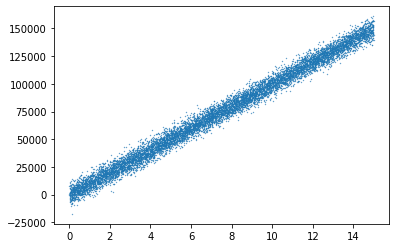

In [5]:
# Get the cars' mileage
cars["mileage"]=m3*cars["age"]+E

plt.scatter(
    cars["age"],
    cars["mileage"],
    s=0.1
)

In [6]:
# Get the cars' price

cars["price"] = b + m1*cars["mileage"] + m2*cars["age"] + W

The mileage and age are probably positively related because the car's driving distance has been cumulated since the car was sold. So the older the vehicle is, the mileage gets larger.   
But, the price and mileage and age are negatively related. The mileage and the age increase means the car is used a lot, so the price goes down.

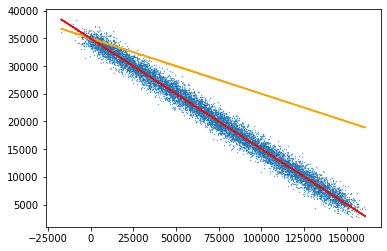

In [7]:
plt.scatter(
    cars["mileage"],
    cars["price"],
    s=0.1
) 

plt.plot(
    cars["mileage"],
    b + m1 * cars["mileage"],
    color="orange"
) 

M2,b2,_,_,_=stats.linregress(cars["mileage"],cars["price"])

plt.plot(
    cars["mileage"],
    b2 + M2 * cars["mileage"],
    color="red"
)

According to a scatter plot, we could see that as mileage goes up, the price goes down. The orange line plot shows us that the graph differs from what we got for the scatter plot without considering the errors and the cars' age. You can see the slope and intercept are different. For the red line plot, we used the slope and intercept that we got from the existing values, so it is similar to the scatter plot we got.

In [8]:
cars

,age,mileage,price
0,8.394965,81227.603677,17574.916612
1,4.496931,48573.609158,26415.620324
2,2.629650,29125.948492,27804.412092
3,4.138144,33200.782365,28570.694064
4,4.186988,39535.828308,25258.795200
...,...,...,...
9995,9.658909,97865.045213,16812.640645
9996,14.797323,154263.342796,4923.542464
9997,6.231421,64382.323420,20175.985290
9998,4.157553,42120.272594,26495.104585


In [9]:
cars.describe()

,age,mileage,price
count,10000.000000,10000.000000,10000.000000
mean,7.409112,74086.215464,20198.975846
std,4.287077,43101.529693,8659.099477
min,0.000308,-17432.155400,2765.813392
25%,3.741066,36963.883159,12743.635364
50%,7.362864,74064.774798,20256.011249
75%,11.136058,111286.768436,27605.450188
max,14.999916,160989.199118,38338.949755


m1 is the relationship between the price and the mileage; if the mileage increases, the price drops. So I set the m1 as -0.1 which is a negative value. And m2 is the relationship between the price and the age. For the same reason as m1, I used a negative value '-1000' for m2. m3 represents the positive relationship between the mileage and the age is positive because as time passed by, the distance grew. So I set the m3 as 10000.b is the average price of the car and I set it as 35000. If the vehicle is never used, so the age and mileage are zero, b would be the price of the vehicle.

Since we generated the age between zero and 15, so the maximum and the minimum age is in the range of 0 to 15.    

# Question 2
 Plot the distributions of the age, mileage, and price of the car. Include a vertical line at the mean of each distribution.


#### 1. The histogram of the cars' age


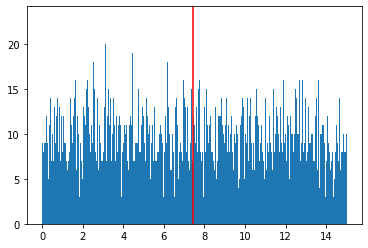

In [10]:
plt.hist(
    cars["age"],
    bins=1000
)
plt.axvline(cars["age"].mean(),color="red")

#### 2. The histogram of the cars' mileage

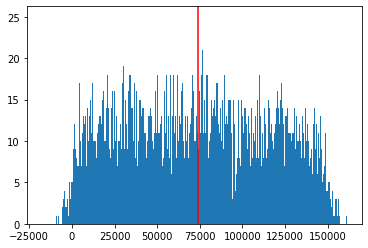

In [11]:
plt.hist(
    cars["mileage"],
    bins=1000
)
plt.axvline(cars["mileage"].mean(),color="red")

#### 3. The histogram of the cars' price

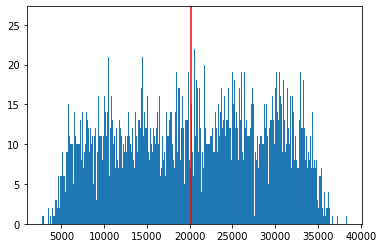

In [12]:
plt.hist(
    cars["price"],
    bins=1000
)
plt.axvline(cars["price"].mean(),color="red")

# Question 3
 Estimate a linear regression with price as the dependent (y) variable and mileage as the independent (x) variable. Are the numbers what you’d expect? Why or why not?

In [13]:
#m is a slope, and b is an intercept.

M3,b3,_,_,_=stats.linregress(cars["mileage"],cars["price"])
print(M3,b3)

-0.1992274029870917 34958.98015016939


Used the 'linregress()' method to estimate a linear regression with price as the dependent(y) variable and mileage as the independent(x) variable. The numbers, the slope and the intercept, are close to what I expected, but it is slightly different because we did not consider the car's age and the errors.

# Question 4
 Use the EJSCREEN_demo3.csv data to describe the correlation between OZONE and PM25.

[[1.0 0.26438062601371476]
 [0.26438062601371476 1.0]]


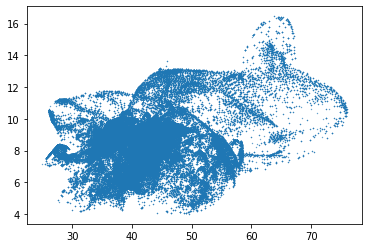

In [14]:
ej_df = pd.read_csv("https://github.com/danhammer/envirods/blob/main/data/EJSCREEN_demo3.csv?raw=true")

ej_df.describe()
plt.scatter(
    ej_df["OZONE"],
    ej_df["PM25"],
    s=0.1
)

print(corrcoef(ej_df["OZONE"],ej_df["PM25"]))

It is hard to find the relationship between OZONE and PM25 in the graph. So, I used the 'corrcoef()' method to get the correlation coefficient. The correlation coefficient is approximately 0.264, so we can say that OZONE and PM25 are in a small positive correlation.

# Question 5
Consider this URL and explore the parameters and response data:

https://api.e7e.dev/news/retrieve?themes=wildlands&limit=2000&daysback=365

This API returns geolocated stories for display at news.earthrise.media. By adjusting the URL and using the requests library, how many stories were tagged with pollution in the last 30 days? Print the titles of the stories. (Hint: There is a default number for the limit parameter.)

In [15]:
#Get the data tagged with pollution in the last 30 days.
r=requests.get("https://api.e7e.dev/news/retrieve?themes=pollution&limit=2000&daysback=30")
response=r.json()

#Get the number of the stories tagged with pollution in the last 30 days.
len(response)

185

In [16]:
#Since the data type of response is a list, use for loop to access each dictionary in the list
#Get the title of each stories
for elements in response:
  print(elements["Title"])

Algae bloom season in Alberta is here. What can we do about it?
UPL claims 'no serious health impact' for neighbouring community from unrest toxic spill
SC paper mill sued again over stink that left thousands complaining
Flooding could expose toxic soil in city neighborhoods
Covington resident sues chemical company after reported explosion at NKY plastics plant
Here Are The 13 Most Polluted And Unsafe Beaches In Lebanon
These Ontario Parks public beaches are safe for swimming (July 22)
‘Forever chemicals’ lawsuits: Wisconsin Attorney General Josh Kaul sues 18 companies over PFAS contamination
Maryland finds CSX violated pollution rules in explosion that rocked Baltimore coal facility
Summer Camp participants study importance of water quality
Witness: Union Carbide Landfill Leaking Toxics ‘As We Speak'
Troubled Water: Public water operator's violations keep flowing in Oklahoma
HAB Task Force feels public outcry may be the only way to affect change in local water quality
CSX gets violati

In [17]:
#Another way to get the data
base_url="https://api.e7e.dev/news/retrieve"
payload = {"themes":"pollution","limit":2000,"daysback":30}

r2 = requests.get(base_url,params=payload)
response2 = r.json()
print(len(response2))

185
